# Pre-Reveal Sales

In [1]:
"""
Update Parameters Here
"""
COLLECTION_NAME = "MekaVerse"
CONTRACT = "0x9A534628B4062E123cE7Ee2222ec20B86e16Ca8F"
YEAR = "2021"
MONTH = "10"
DAY = "13"
HOUR = "15"
MINUTE = "00"

METHOD = "raritytools"
TOKEN_COL = "TOKEN_ID"

In [2]:
"""
@author: mdigi14
"""

import pandas as pd
import matplotlib.pyplot as plt

from honestnft_utils import config
from honestnft_utils import constants
from honestnft_utils import opensea


REVEAL_TIME = "{}-{}-{}T{}:{}:00".format(YEAR, MONTH, DAY, HOUR, MINUTE)

"""
Plot params
"""

plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

"""
Helper Functions
"""


def get_all_sales():
    data = opensea.get_opensea_events(
        contract_address=CONTRACT,
        occurred_before=REVEAL_TIME,
        event_type="successful",
    )

    print("Events returned :", len(data))
    return data

Events returned : 4491


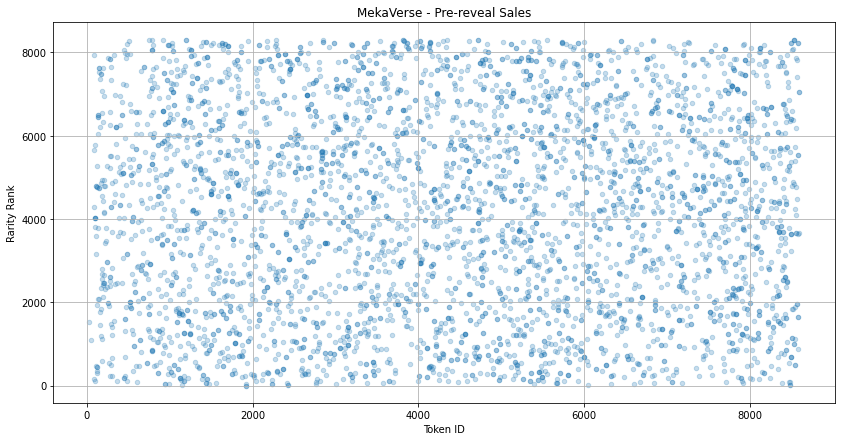

In [3]:
RARITY_CSV = f"{config.RARITY_FOLDER}/{COLLECTION_NAME}_{METHOD}.csv"
RARITY_DB = pd.read_csv(RARITY_CSV)

sales_list = []
data = get_all_sales()

for event in data:
    try:
        token_id = int(event["asset"]["token_id"])
        sale = dict()
        sale[TOKEN_COL] = token_id
        sale["USER"] = event["transaction"]["from_account"]["address"]
        sale["DATE"] = event["created_date"]
        sale["RANK"] = int(RARITY_DB[RARITY_DB[TOKEN_COL] == token_id]["Rank"])
        sale["PRICE"] = float(event["total_price"]) / constants.ETHER_UNITS  # type: ignore
        sales_list.append(sale)
    except:
        continue

"""
Generate Plot
"""


sales_df = pd.DataFrame(sales_list)
sales_df = sales_df.sort_values(by="DATE")
sales_df.to_csv(
    f"{config.PRE_REVEAL_SALES_FOLDER}/{COLLECTION_NAME}_pre-reveal_sales.csv",
    index=False,
)

ax = sales_df.plot.scatter(
    x="TOKEN_ID",
    y="RANK",
    grid=True,
    alpha=0.25,
    title=f"{COLLECTION_NAME} - Pre-reveal Sales",
    figsize=(14, 7),
    xlabel="Token ID",
    ylabel="Rarity Rank",
)